Project : 2 Disease Prediction from Medical Data

 Create a model to predict the likelihood of a disease
 based on medical data (e.g., symptoms, patient
 history). Use datasets with labeled medical records and
 apply classification algorithms.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Data preprocessing and data uploaded

In [69]:
df = pd.read_csv('disease_dataset.csv')
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [70]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [71]:
df.tail()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN
4919,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,Impetigo,NaN


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [73]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [74]:
df.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [75]:
df.shape

(4920, 134)

We can drop the column un-named cuz this col completely empty or null

In [76]:
df.drop(columns = 'Unnamed: 133', inplace = True)

we can intialize the feature cols and target col

In [77]:
X = df.drop(columns = 'prognosis')
Y = df['prognosis']

we can split the data into train and test data

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size= 0.2, random_state= 2)

We can train the model into different classifier model

In [79]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
y_pred_lr = lr.predict(xtest)
y_pred_lr

array(['Migraine', 'Hepatitis D', 'Chicken pox', 'Arthritis',
       'Tuberculosis', 'Hepatitis C', 'Cervical spondylosis', 'Pneumonia',
       'Hyperthyroidism', 'Drug Reaction', 'Hepatitis C', 'Tuberculosis',
       'Acne', 'Jaundice', 'Hepatitis E', 'Chicken pox',
       'Paralysis (brain hemorrhage)', 'Gastroenteritis',
       'Bronchial Asthma', 'Gastroenteritis',
       'Paralysis (brain hemorrhage)', 'Alcoholic hepatitis',
       'Cervical spondylosis', 'Hepatitis E', 'Hepatitis C',
       'Hypoglycemia', 'Diabetes ', 'hepatitis A', 'Jaundice',
       'Paralysis (brain hemorrhage)', 'Chronic cholestasis',
       'hepatitis A', 'Typhoid', 'Malaria', 'Hepatitis C', 'Allergy',
       'Hypothyroidism', 'Hepatitis B', 'Migraine', 'Diabetes ',
       'hepatitis A', 'Hyperthyroidism', 'Psoriasis',
       'Paralysis (brain hemorrhage)', 'Migraine', 'Gastroenteritis',
       'Urinary tract infection', 'AIDS', 'Pneumonia', 'Chicken pox',
       'Dimorphic hemmorhoids(piles)', 'Malaria',
 

In [80]:
knn = KNeighborsClassifier(n_neighbors= 5)
knn.fit(xtrain, ytrain)
y_pred_knn = knn.predict(xtest)
y_pred_knn

array(['Migraine', 'Hepatitis D', 'Chicken pox', 'Arthritis',
       'Tuberculosis', 'Hepatitis C', 'Cervical spondylosis', 'Pneumonia',
       'Hyperthyroidism', 'Drug Reaction', 'Hepatitis C', 'Tuberculosis',
       'Acne', 'Jaundice', 'Hepatitis E', 'Chicken pox',
       'Paralysis (brain hemorrhage)', 'Gastroenteritis',
       'Bronchial Asthma', 'Gastroenteritis',
       'Paralysis (brain hemorrhage)', 'Alcoholic hepatitis',
       'Cervical spondylosis', 'Hepatitis E', 'Hepatitis C',
       'Hypoglycemia', 'Diabetes ', 'hepatitis A', 'Jaundice',
       'Paralysis (brain hemorrhage)', 'Chronic cholestasis',
       'hepatitis A', 'Typhoid', 'Malaria', 'Hepatitis C', 'Allergy',
       'Hypothyroidism', 'Hepatitis B', 'Migraine', 'Diabetes ',
       'hepatitis A', 'Hyperthyroidism', 'Psoriasis',
       'Paralysis (brain hemorrhage)', 'Migraine', 'Gastroenteritis',
       'Urinary tract infection', 'AIDS', 'Pneumonia', 'Chicken pox',
       'Dimorphic hemmorhoids(piles)', 'Malaria',
 

In [81]:
svc = SVC(kernel= 'linear')
svc.fit(xtrain, ytrain)
y_pred_svc = svc.predict(xtest)
y_pred_svc

array(['Migraine', 'Hepatitis D', 'Chicken pox', 'Arthritis',
       'Tuberculosis', 'Hepatitis C', 'Cervical spondylosis', 'Pneumonia',
       'Hyperthyroidism', 'Drug Reaction', 'Hepatitis C', 'Tuberculosis',
       'Acne', 'Jaundice', 'Hepatitis E', 'Chicken pox',
       'Paralysis (brain hemorrhage)', 'Gastroenteritis',
       'Bronchial Asthma', 'Gastroenteritis',
       'Paralysis (brain hemorrhage)', 'Alcoholic hepatitis',
       'Cervical spondylosis', 'Hepatitis E', 'Hepatitis C',
       'Hypoglycemia', 'Diabetes ', 'hepatitis A', 'Jaundice',
       'Paralysis (brain hemorrhage)', 'Chronic cholestasis',
       'hepatitis A', 'Typhoid', 'Malaria', 'Hepatitis C', 'Allergy',
       'Hypothyroidism', 'Hepatitis B', 'Migraine', 'Diabetes ',
       'hepatitis A', 'Hyperthyroidism', 'Psoriasis',
       'Paralysis (brain hemorrhage)', 'Migraine', 'Gastroenteritis',
       'Urinary tract infection', 'AIDS', 'Pneumonia', 'Chicken pox',
       'Dimorphic hemmorhoids(piles)', 'Malaria',
 

In [82]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain, ytrain)
y_pred_dtc = dtc.predict(xtest)
y_pred_dtc

array(['Migraine', 'Hepatitis D', 'Chicken pox', 'Arthritis',
       'Tuberculosis', 'Hepatitis C', 'Cervical spondylosis', 'Pneumonia',
       'Hyperthyroidism', 'Drug Reaction', 'Hepatitis C', 'Tuberculosis',
       'Acne', 'Jaundice', 'Hepatitis E', 'Chicken pox',
       'Paralysis (brain hemorrhage)', 'Gastroenteritis',
       'Bronchial Asthma', 'Gastroenteritis',
       'Paralysis (brain hemorrhage)', 'Alcoholic hepatitis',
       'Cervical spondylosis', 'Hepatitis E', 'Hepatitis C',
       'Hypoglycemia', 'Diabetes ', 'hepatitis A', 'Jaundice',
       'Paralysis (brain hemorrhage)', 'Chronic cholestasis',
       'hepatitis A', 'Typhoid', 'Malaria', 'Hepatitis C', 'Allergy',
       'Hypothyroidism', 'Hepatitis B', 'Migraine', 'Diabetes ',
       'hepatitis A', 'Hyperthyroidism', 'Psoriasis',
       'Paralysis (brain hemorrhage)', 'Migraine', 'Gastroenteritis',
       'Urinary tract infection', 'AIDS', 'Pneumonia', 'Chicken pox',
       'Dimorphic hemmorhoids(piles)', 'Malaria',
 

Evaluate the accuracy score of all models

In [83]:
acc_score_lr = accuracy_score(ytest, y_pred_lr)
print("The accuracy score of the Logistic Regressor is", acc_score_lr)


acc_score_knn = accuracy_score(ytest, y_pred_knn)
print("The accuracy score of the K-Nearest Neighbors Classifier is", acc_score_knn)


acc_score_svc = accuracy_score(ytest, y_pred_svc)
print("The accuracy score of the Support Vector Classifier is", acc_score_svc)


acc_score_dtc = accuracy_score(ytest, y_pred_dtc)
print("The accuracy score of the Decision Tree Classifier is", acc_score_dtc)


The accuracy score of the Logistic Regressor is 1.0
The accuracy score of the K-Nearest Neighbors Classifier is 1.0
The accuracy score of the Support Vector Classifier is 1.0
The accuracy score of the Decision Tree Classifier is 1.0


Evalute the all models performance by using the cross validation score

In [84]:
def cross_val(model):
    cross_validation = cross_val_score(model, X, Y, cv=5)
    cross_validation_mean = cross_validation.sum()/len(cross_validation)
    print(f"The cross validation score of the {model} is", cross_validation_mean)

In [85]:
cross_val(lr)

The cross validation score of the LogisticRegression() is 1.0


In [86]:
cross_val(knn)

The cross validation score of the KNeighborsClassifier() is 1.0


In [87]:
cross_val(svc)

The cross validation score of the SVC(kernel='linear') is 1.0


In [88]:
cross_val(dtc)

The cross validation score of the DecisionTreeClassifier() is 1.0


Create the Classifiaction report of all models

In [89]:
class_score_lr = classification_report(ytest, y_pred_lr)
print("The classification report of Logistic Regressor is: \n", class_score_lr)

The classification report of Logistic Regressor is: 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        22
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        30
                    Alcoholic hepatitis       1.00      1.00      1.00        30
                                Allergy       1.00      1.00      1.00        19
                              Arthritis       1.00      1.00      1.00        30
                       Bronchial Asthma       1.00      1.00      1.00        18
                   Cervical spondylosis       1.00      1.00      1.00        18
                            Chicken pox       1.00      1.00      1.00        16
                    Chronic cholestasis       1.00      1.00      1.00        18
                            Common Cold       1.00    

In [90]:
class_score_knn = classification_report(ytest, y_pred_knn)
print("The classification report of K-Nearest Neighbors Classifier is: \n", class_score_knn)

The classification report of K-Nearest Neighbors Classifier is: 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        22
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        30
                    Alcoholic hepatitis       1.00      1.00      1.00        30
                                Allergy       1.00      1.00      1.00        19
                              Arthritis       1.00      1.00      1.00        30
                       Bronchial Asthma       1.00      1.00      1.00        18
                   Cervical spondylosis       1.00      1.00      1.00        18
                            Chicken pox       1.00      1.00      1.00        16
                    Chronic cholestasis       1.00      1.00      1.00        18
                            Common Cold   

In [91]:
class_score_svc = classification_report(ytest, y_pred_svc)
print("The classification report of Support Vector Classifier is: \n", class_score_svc)

The classification report of Support Vector Classifier is: 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        22
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        30
                    Alcoholic hepatitis       1.00      1.00      1.00        30
                                Allergy       1.00      1.00      1.00        19
                              Arthritis       1.00      1.00      1.00        30
                       Bronchial Asthma       1.00      1.00      1.00        18
                   Cervical spondylosis       1.00      1.00      1.00        18
                            Chicken pox       1.00      1.00      1.00        16
                    Chronic cholestasis       1.00      1.00      1.00        18
                            Common Cold       1

In [92]:
class_score_dtc = classification_report(ytest, y_pred_dtc)
print("The classification report of Decision Tree Classifier is: \n", class_score_dtc)

The classification report of Decision Tree Classifier is: 
                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        22
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        30
                    Alcoholic hepatitis       1.00      1.00      1.00        30
                                Allergy       1.00      1.00      1.00        19
                              Arthritis       1.00      1.00      1.00        30
                       Bronchial Asthma       1.00      1.00      1.00        18
                   Cervical spondylosis       1.00      1.00      1.00        18
                            Chicken pox       1.00      1.00      1.00        16
                    Chronic cholestasis       1.00      1.00      1.00        18
                            Common Cold       1.

Create a confusion matrix to check the model's performance

The Confusion Matrix of Logistic Regressor model is : 
 [[22  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 24]]


<Axes: >

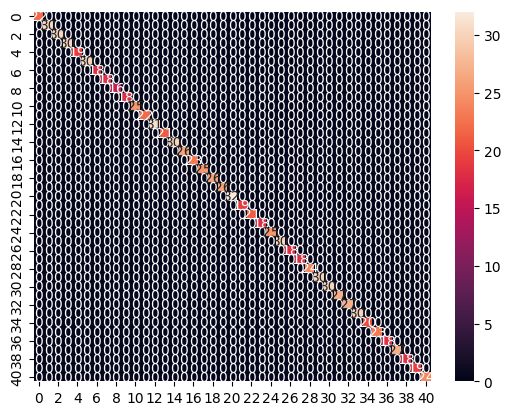

In [93]:
conf_matrix_lr = confusion_matrix(ytest, y_pred_lr)
print("The Confusion Matrix of Logistic Regressor model is : \n", conf_matrix_lr)


sns.heatmap(conf_matrix_lr, annot= True)

The Confusion Matrix of K-Nearest model is : 
 [[22  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 24]]


<Axes: >

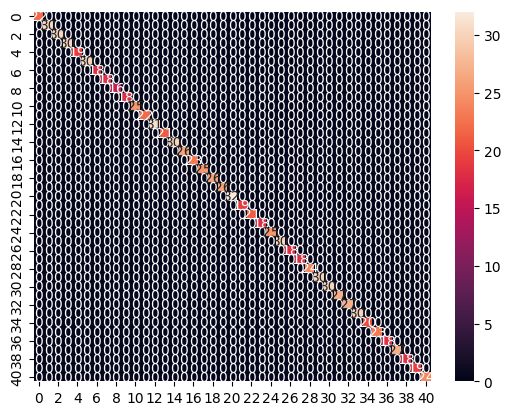

In [94]:
conf_matrix_knn = confusion_matrix(ytest, y_pred_knn)
print("The Confusion Matrix of K-Nearest model is : \n", conf_matrix_knn)


sns.heatmap(conf_matrix_knn, annot= True)

The Confusion Matrix of Support Vector model is : 
 [[22  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 24]]


<Axes: >

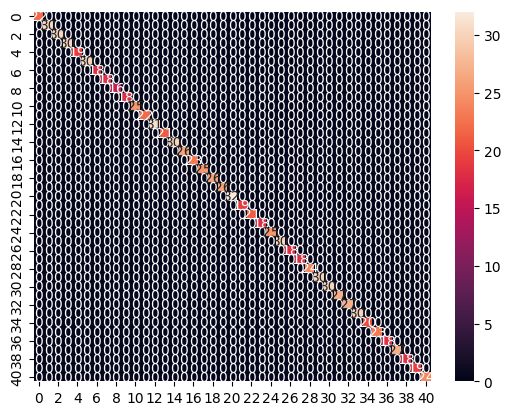

In [95]:
conf_matrix_svc = confusion_matrix(ytest, y_pred_svc)
print("The Confusion Matrix of Support Vector model is : \n", conf_matrix_svc)


sns.heatmap(conf_matrix_svc, annot= True)

The Confusion Matrix of Decision Tree model is : 
 [[22  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 30 ...  0  0  0]
 ...
 [ 0  0  0 ... 18  0  0]
 [ 0  0  0 ...  0 19  0]
 [ 0  0  0 ...  0  0 24]]


<Axes: >

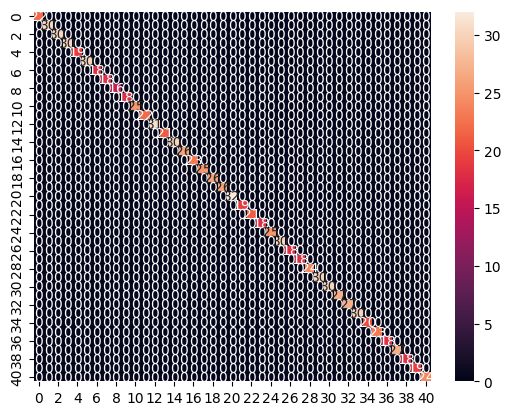

In [96]:
conf_matrix_dtc = confusion_matrix(ytest, y_pred_dtc)
print("The Confusion Matrix of Decision Tree model is : \n", conf_matrix_dtc)


sns.heatmap(conf_matrix_dtc, annot= True)